# ChIP-seq Genomic Range Annotation

In [1]:
import genomic_features as gf

import bioframe
import seaborn
import matplotlib.pyplot as plt
import numpy as np

## Download example data

The data used in this tutorial is ChIP-seq IDR ranked peaks with target CTCF, downloaded from ENCODE (accession: ENCFF417KHZ). The data is from CRISPR modified homo sapiens cell line HCT116 and more information about the dataset can be found on the ENCODE website [here](https://www.encodeproject.org/experiments/ENCSR385CDF/). Column names are assigned by bioframe using the function [read_table()](https://bioframe.readthedocs.io/en/latest/api-fileops.html#bioframe.io.fileops.read_table) based on the column contents.

In [8]:
ctcf_peak = bioframe.read_table(
    "https://www.encodeproject.org/files/ENCFF417KHZ/@@download/ENCFF417KHZ.bed.gz",
    schema="narrowPeak",
)

ctcf_peak

/Users/vmuckerson/.venv/lib/python3.12/site-packages/bioframe/io/fileops.py:74: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


chrom      start        end name  score strand         fc  -log10p  \
0       chr10   99392395   99392827    .   1000      .  306.78095     -1.0   
1        chr3  194929204  194929707    .   1000      .  284.09197     -1.0   
2        chr8   97559907   97560401    .   1000      .  284.16880     -1.0   
3        chr8   66609310   66609747    .   1000      .  265.66492     -1.0   
4       chr15   66903598   66904095    .   1000      .  263.27660     -1.0   
...       ...        ...        ...  ...    ...    ...        ...      ...   
129238  chr17   55794221   55794717    .     78      .    5.91739     -1.0   
129239   chr5   39135451   39135947    .     78      .    6.62387     -1.0   
129240  chr20   16241885   16242381    .     78      .    8.24784     -1.0   
129241   chr2   39231186   39231682    .     78      .    6.21278     -1.0   
129242  chr16   84553939   84554435    .     78      .    8.06121     -1.0   

        -log10q  relSummit  
0       4.96085        230  
1       4.96085        234  
2       4.96085        242  
3       4.96085        238  
4       4.96085        252  
...         ...        ...  
129238  0.35122        248  
129239  0.51343        248  
129240  0.96486        248  
129241  0.42335        248  
129242  0.91185        248  

[129243 rows x 10 columns]

## Download Ensembl annotations using genomic_features

Using the genomic ranges provided in the bed file's `chrom`, `start`, and `end` columns we can ascribe an ensembl gene id from EnsemblDB to each peak. Read in the correct ensembl annotation version to match to the data.
It's possible to add more columns to the returned dataframe if exon, protein, or sequence information that is not included by default is needed. The function list_columns() shows all possible columns.

In [9]:
ensdb = gf.ensembl.annotation(species="Hsapiens", version="108")

ensdb.list_columns()

['seq_name',
 'seq_length',
 'is_circular',
 'gene_id',
 'entrezid',
 'exon_id',
 'exon_seq_start',
 'exon_seq_end',
 'gene_id',
 'gene_name',
 'gene_biotype',
 'gene_seq_start',
 'gene_seq_end',
 'seq_name',
 'seq_strand',
 'seq_coord_system',
 'description',
 'gene_id_version',
 'canonical_transcript',
 'name',
 'value',
 'tx_id',
 'protein_id',
 'protein_sequence',
 'protein_id',
 'protein_domain_id',
 'protein_domain_source',
 'interpro_accession',
 'prot_dom_start',
 'prot_dom_end',
 'tx_id',
 'tx_biotype',
 'tx_seq_start',
 'tx_seq_end',
 'tx_cds_seq_start',
 'tx_cds_seq_end',
 'gene_id',
 'tx_support_level',
 'tx_id_version',
 'gc_content',
 'tx_external_name',
 'tx_is_canonical',
 'tx_id',
 'exon_id',
 'exon_idx',
 'protein_id',
 'uniprot_id',
 'uniprot_db',
 'uniprot_mapping_type']

In [10]:
genes = ensdb.genes(
    filter=gf.filters.GeneBioTypeFilter("protein_coding"),
)

genes

gene_id gene_name    gene_biotype  gene_seq_start  \
0      ENSG00000000003    TSPAN6  protein_coding       100627108   
1      ENSG00000000005      TNMD  protein_coding       100584936   
2      ENSG00000000419      DPM1  protein_coding        50934867   
3      ENSG00000000457     SCYL3  protein_coding       169849631   
4      ENSG00000000460  C1orf112  protein_coding       169662007   
...                ...       ...             ...             ...   
22890  ENSG00000290318            protein_coding        49357176   
22891  ENSG00000290320     H2BN1  protein_coding        32895433   
22892  ENSG00000291237      SOD2  protein_coding       159669069   
22893  ENSG00000291239            protein_coding        36850858   
22894  ENSG00000291240            protein_coding        21008247   

       gene_seq_end seq_name  seq_strand seq_coord_system  \
0         100639991        X          -1       chromosome   
1         100599885        X           1       chromosome   
2          50959140       20          -1       chromosome   
3         169894267        1          -1       chromosome   
4         169854080        1           1       chromosome   
...             ...      ...         ...              ...   
22890      49412051        3          -1       chromosome   
22891      32906586       17           1       chromosome   
22892     159762529        6          -1       chromosome   
22893      36998682       19           1       chromosome   
22894      21032572       22          -1       chromosome   

                                             description     gene_id_version  \
0      tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858]  ENSG00000000003.15   
1        tenomodulin [Source:HGNC Symbol;Acc:HGNC:17757]   ENSG00000000005.6   
2      dolichyl-phosphate mannosyltransferase subunit...  ENSG00000000419.14   
3      SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...  ENSG00000000457.14   
4      chromosome 1 open reading frame 112 [Source:HG...  ENSG00000000460.17   
...                                                  ...                 ...   
22890                                      novel protein   ENSG00000290318.1   
22891  H2B.N variant histone 1 [Source:HGNC Symbol;Ac...   ENSG00000290320.1   
22892  superoxide dismutase 2 [Source:HGNC Symbol;Acc...   ENSG00000291237.1   
22893                                      novel protein   ENSG00000291239.1   
22894                                      novel protein   ENSG00000291240.1   

      canonical_transcript  
0          ENST00000373020  
1          ENST00000373031  
2          ENST00000371588  
3          ENST00000367771  
4          ENST00000359326  
...                    ...  
22890      ENST00000704381  
22891      ENST00000704639  
22892      ENST00000538183  
22893      ENST00000706165  
22894      ENST00000706202  

[22895 rows x 11 columns]

## Mapping chromosome annotation styles

In order to annotate the ranges in the dataframe with gene symbols, ensembl ids, strand direction, etc. the two dataframes need to be merged. To make this seemless we use the bioframe [assembly_info](https://bioframe.readthedocs.io/en/latest/api-resources.html#bioframe.io.assembly.assembly_info) to map the numeric Ensembl chromosome annotation with the "chr" notation of the CHIP-Seq dataset and remove any peaks with unmapped chromosome values. This step is optional but makes joining the two dataframes much simpler in the next step.

In [11]:
from bioframe import assembly_info

hg38 = assembly_info("hg38")

In [12]:
genes["seq_name"] = genes["seq_name"].map(hg38.alias_dict)

genes = genes.dropna(subset="seq_name")
genes

gene_id gene_name    gene_biotype  gene_seq_start  \
0      ENSG00000000003    TSPAN6  protein_coding       100627108   
1      ENSG00000000005      TNMD  protein_coding       100584936   
2      ENSG00000000419      DPM1  protein_coding        50934867   
3      ENSG00000000457     SCYL3  protein_coding       169849631   
4      ENSG00000000460  C1orf112  protein_coding       169662007   
...                ...       ...             ...             ...   
22890  ENSG00000290318            protein_coding        49357176   
22891  ENSG00000290320     H2BN1  protein_coding        32895433   
22892  ENSG00000291237      SOD2  protein_coding       159669069   
22893  ENSG00000291239            protein_coding        36850858   
22894  ENSG00000291240            protein_coding        21008247   

       gene_seq_end seq_name  seq_strand seq_coord_system  \
0         100639991     chrX          -1       chromosome   
1         100599885     chrX           1       chromosome   
2          50959140    chr20          -1       chromosome   
3         169894267     chr1          -1       chromosome   
4         169854080     chr1           1       chromosome   
...             ...      ...         ...              ...   
22890      49412051     chr3          -1       chromosome   
22891      32906586    chr17           1       chromosome   
22892     159762529     chr6          -1       chromosome   
22893      36998682    chr19           1       chromosome   
22894      21032572    chr22          -1       chromosome   

                                             description     gene_id_version  \
0      tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858]  ENSG00000000003.15   
1        tenomodulin [Source:HGNC Symbol;Acc:HGNC:17757]   ENSG00000000005.6   
2      dolichyl-phosphate mannosyltransferase subunit...  ENSG00000000419.14   
3      SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...  ENSG00000000457.14   
4      chromosome 1 open reading frame 112 [Source:HG...  ENSG00000000460.17   
...                                                  ...                 ...   
22890                                      novel protein   ENSG00000290318.1   
22891  H2B.N variant histone 1 [Source:HGNC Symbol;Ac...   ENSG00000290320.1   
22892  superoxide dismutase 2 [Source:HGNC Symbol;Acc...   ENSG00000291237.1   
22893                                      novel protein   ENSG00000291239.1   
22894                                      novel protein   ENSG00000291240.1   

      canonical_transcript  
0          ENST00000373020  
1          ENST00000373031  
2          ENST00000371588  
3          ENST00000367771  
4          ENST00000359326  
...                    ...  
22890      ENST00000704381  
22891      ENST00000704639  
22892      ENST00000538183  
22893      ENST00000706165  
22894      ENST00000706202  

[20012 rows x 11 columns]

## Merging genomic ranges to annotate Ensembl ids and gene names

When joining the two dataframes we can use the [overlap()](https://bioframe.readthedocs.io/en/latest/api-intervalops.html#bioframe.ops.overlap) function to join the dataframes based on the gene region the peak overlaps with the most. The cols1 option passes synonymous column names from the ensembl dataframe to the corresponding ctcf peak columns for matching. Now each remaining peak has an ensembl id and gene name.

In [13]:
gene_ov = bioframe.overlap(
    ctcf_peak, genes, cols2=["seq_name", "gene_seq_start", "gene_seq_end"], how="inner"
)

gene_ov

chrom      start        end name  score strand        fc  -log10p  \
0      chr22   17563181   17563677    .    748      .  23.66046     -1.0   
1      chr22   19179353   19179849    .    800      .  37.47772     -1.0   
2      chr22   19756445   19756941    .    885      .  35.76666     -1.0   
3      chr22   20016770   20017266    .    176      .  11.34425     -1.0   
4      chr22   20916962   20917458    .    484      .  22.82968     -1.0   
...      ...        ...        ...  ...    ...    ...       ...      ...   
73773   chr8  144895624  144896120    .     78      .   8.95825     -1.0   
73774   chr8  144900092  144900588    .   1000      .  63.47950     -1.0   
73775   chr8  144901897  144902393    .    454      .  37.27992     -1.0   
73776   chr8  144934494  144934990    .    385      .  12.88503     -1.0   
73777   chr8  145065907  145066403    .     78      .  10.13864     -1.0   

       -log10q  relSummit  ... gene_name_   gene_biotype_ gene_seq_start_  \
0      4.96085        248  ...   SLC25A18  protein_coding        17563450   
1      4.96085        248  ...     CLTCL1  protein_coding        19179473   
2      4.96085        248  ...       TBX1  protein_coding        19756703   
3      2.13939        248  ...     TANGO2  protein_coding        20017014   
4      4.96085        248  ...       CRKL  protein_coding        20917407   
...        ...        ...  ...        ...             ...             ...   
73773  1.20680        248  ...     ZNF250  protein_coding       144876497   
73774  4.96085        248  ...     ZNF250  protein_coding       144876497   
73775  4.96085        248  ...     ZNF250  protein_coding       144876497   
73776  2.82659        248  ...      ZNF16  protein_coding       144930358   
73777  1.63946        248  ...    C8orf33  protein_coding       145052465   

       gene_seq_end_  seq_name_ seq_strand_  seq_coord_system_  \
0           17590995      chr22           1         chromosome   
1           19291719      chr22          -1         chromosome   
2           19783593      chr22           1         chromosome   
3           20067164      chr22           1         chromosome   
4           20953747      chr22           1         chromosome   
...              ...        ...         ...                ...   
73773      144902168       chr8          -1         chromosome   
73774      144902168       chr8          -1         chromosome   
73775      144902168       chr8          -1         chromosome   
73776      144950888       chr8          -1         chromosome   
73777      145066685       chr8           1         chromosome   

                                            description_    gene_id_version_  \
0      solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
1      clathrin heavy chain like 1 [Source:HGNC Symbo...  ENSG00000070371.16   
2      T-box transcription factor 1 [Source:HGNC Symb...  ENSG00000184058.16   
3      transport and golgi organization 2 homolog [So...  ENSG00000183597.16   
4      CRK like proto-oncogene, adaptor protein [Sour...  ENSG00000099942.13   
...                                                  ...                 ...   
73773  zinc finger protein 250 [Source:HGNC Symbol;Ac...  ENSG00000196150.14   
73774  zinc finger protein 250 [Source:HGNC Symbol;Ac...  ENSG00000196150.14   
73775  zinc finger protein 250 [Source:HGNC Symbol;Ac...  ENSG00000196150.14   
73776  zinc finger protein 16 [Source:HGNC Symbol;Acc...  ENSG00000170631.15   
73777  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   

      canonical_transcript_  
0           ENST00000327451  
1           ENST00000427926  
2           ENST00000649276  
3           ENST00000327374  
4           ENST00000354336  
...                     ...  
73773       ENST00000417550  
73774       ENST00000417550  
73775       ENST00000417550  
73776       ENST00000394909  
73777       ENST00000331434  

[73778 rows x 21 columns]

## Annotating exons and introns

Ensembl DB also has an exon table that we can use to select exon/intron peaks if they were not already loaded via the gene table. To keep consistent chromosome style, we again map seq_name using bioframe and drop unmapped chromosome names.

In [14]:
exons = ensdb.exons(filter=gf.filters.GeneIDFilter(gene_ov["gene_id_"]))

exons["seq_name"] = exons["seq_name"].map(hg38.alias_dict)

exons = exons.dropna(subset="seq_name")
exons

exon_id  exon_seq_start  exon_seq_end seq_name  \
0       ENSE00001855382       100636608     100636806     chrX   
1       ENSE00003662440       100635558     100635746     chrX   
2       ENSE00003654571       100635178     100635252     chrX   
3       ENSE00003658810       100633931     100634029     chrX   
4       ENSE00003554016       100633405     100633539     chrX   
...                 ...             ...           ...      ...   
513101  ENSE00003995056        21029711      21030351    chr22   
513102  ENSE00003995060        21029336      21029444    chr22   
513103  ENSE00003995062        21013042      21013184    chr22   
513104  ENSE00003995061        21011384      21011590    chr22   
513105  ENSE00003995059        21008247      21009449    chr22   

                gene_id  
0       ENSG00000000003  
1       ENSG00000000003  
2       ENSG00000000003  
3       ENSG00000000003  
4       ENSG00000000003  
...                 ...  
513101  ENSG00000291240  
513102  ENSG00000291240  
513103  ENSG00000291240  
513104  ENSG00000291240  
513105  ENSG00000291240  

[513106 rows x 5 columns]

We can overlap our peaks again to annotate the peaks that are overlapping exon regions and subsequently label non-overlapping peaks as introns.

In [15]:
exon_ov = bioframe.overlap(
    gene_ov,
    exons,
    cols2=["seq_name", "exon_seq_start", "exon_seq_end"],
    how="left",
)

exon_ov

chrom      start        end name  score strand        fc  -log10p  \
0       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
1       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
2       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
3       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
4       chr22   19179353   19179849    .    800      .  37.47772     -1.0   
...       ...        ...        ...  ...    ...    ...       ...      ...   
111113   chr8  144934494  144934990    .    385      .  12.88503     -1.0   
111114   chr8  145065907  145066403    .     78      .  10.13864     -1.0   
111115   chr8  145065907  145066403    .     78      .  10.13864     -1.0   
111116   chr8  145065907  145066403    .     78      .  10.13864     -1.0   
111117   chr8  145065907  145066403    .     78      .  10.13864     -1.0   

        -log10q  relSummit  ... seq_strand_ seq_coord_system_  \
0       4.96085        248  ...           1        chromosome   
1       4.96085        248  ...           1        chromosome   
2       4.96085        248  ...           1        chromosome   
3       4.96085        248  ...           1        chromosome   
4       4.96085        248  ...          -1        chromosome   
...         ...        ...  ...         ...               ...   
111113  2.82659        248  ...          -1        chromosome   
111114  1.63946        248  ...           1        chromosome   
111115  1.63946        248  ...           1        chromosome   
111116  1.63946        248  ...           1        chromosome   
111117  1.63946        248  ...           1        chromosome   

                                             description_    gene_id_version_  \
0       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
1       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
2       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
3       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
4       clathrin heavy chain like 1 [Source:HGNC Symbo...  ENSG00000070371.16   
...                                                   ...                 ...   
111113  zinc finger protein 16 [Source:HGNC Symbol;Acc...  ENSG00000170631.15   
111114  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   
111115  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   
111116  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   
111117  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   

        canonical_transcript_         exon_id_  exon_seq_start_ exon_seq_end_  \
0             ENST00000327451  ENSE00001540287         17563450      17563713   
1             ENST00000327451  ENSE00001430286         17563464      17563713   
2             ENST00000327451  ENSE00001955974         17563498      17563713   
3             ENST00000327451  ENSE00001866696         17563589      17563713   
4             ENST00000427926  ENSE00003739095         19179473      19179969   
...                       ...              ...              ...           ...   
111113        ENST00000394909             None             <NA>          <NA>   
111114        ENST00000331434  ENSE00003839769        145065708     145066516   
111115        ENST00000331434  ENSE00003840227        145065715     145066624   
111116        ENST00000331434  ENSE00003838341        145065708     145066679   
111117        ENST00000331434  ENSE00003835531        145065708     145066685   

       seq_name_         gene_id_  
0          chr22  ENSG00000182902  
1          chr22  ENSG00000182902  
2          chr22  ENSG00000182902  
3          chr22  ENSG00000182902  
4          chr22  ENSG00000070371  
...          ...              ...  
111113      None             None  
111114      chr8  ENSG00000182307  
111115      chr8  ENSG0000018230

Now we can label the peaks that are mapped to exons as exons and those that are not mapped as introns. A coarser definition is encouraged for introns depending on where the sequence lands in the gene position.

In [16]:
exon_ov["gene_feature"] = np.where(exon_ov["exon_id_"].isnull(), "intron", "exon")
exon_ov

chrom      start        end name  score strand        fc  -log10p  \
0       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
1       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
2       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
3       chr22   17563181   17563677    .    748      .  23.66046     -1.0   
4       chr22   19179353   19179849    .    800      .  37.47772     -1.0   
...       ...        ...        ...  ...    ...    ...       ...      ...   
111113   chr8  144934494  144934990    .    385      .  12.88503     -1.0   
111114   chr8  145065907  145066403    .     78      .  10.13864     -1.0   
111115   chr8  145065907  145066403    .     78      .  10.13864     -1.0   
111116   chr8  145065907  145066403    .     78      .  10.13864     -1.0   
111117   chr8  145065907  145066403    .     78      .  10.13864     -1.0   

        -log10q  relSummit  ... seq_coord_system_  \
0       4.96085        248  ...        chromosome   
1       4.96085        248  ...        chromosome   
2       4.96085        248  ...        chromosome   
3       4.96085        248  ...        chromosome   
4       4.96085        248  ...        chromosome   
...         ...        ...  ...               ...   
111113  2.82659        248  ...        chromosome   
111114  1.63946        248  ...        chromosome   
111115  1.63946        248  ...        chromosome   
111116  1.63946        248  ...        chromosome   
111117  1.63946        248  ...        chromosome   

                                             description_    gene_id_version_  \
0       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
1       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
2       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
3       solute carrier family 25 member 18 [Source:HGN...  ENSG00000182902.14   
4       clathrin heavy chain like 1 [Source:HGNC Symbo...  ENSG00000070371.16   
...                                                   ...                 ...   
111113  zinc finger protein 16 [Source:HGNC Symbol;Acc...  ENSG00000170631.15   
111114  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   
111115  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   
111116  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   
111117  chromosome 8 open reading frame 33 [Source:HGN...  ENSG00000182307.14   

        canonical_transcript_         exon_id_ exon_seq_start_  exon_seq_end_  \
0             ENST00000327451  ENSE00001540287        17563450       17563713   
1             ENST00000327451  ENSE00001430286        17563464       17563713   
2             ENST00000327451  ENSE00001955974        17563498       17563713   
3             ENST00000327451  ENSE00001866696        17563589       17563713   
4             ENST00000427926  ENSE00003739095        19179473       19179969   
...                       ...              ...             ...            ...   
111113        ENST00000394909             None            <NA>           <NA>   
111114        ENST00000331434  ENSE00003839769       145065708      145066516   
111115        ENST00000331434  ENSE00003840227       145065715      145066624   
111116        ENST00000331434  ENSE00003838341       145065708      145066679   
111117        ENST00000331434  ENSE00003835531       145065708      145066685   

       seq_name_         gene_id_ gene_feature  
0          chr22  ENSG00000182902         exon  
1          chr22  ENSG00000182902         exon  
2          chr22  ENSG00000182902         exon  
3          chr22  ENSG00000182902         exon  
4          chr22  ENSG00000070371         exon  
...          ...              ...          ...  
111113      None             None       intron  
111114      chr8  ENSG00000182307         exon  
111115      chr8  ENSG00000182307         exon  
111116    

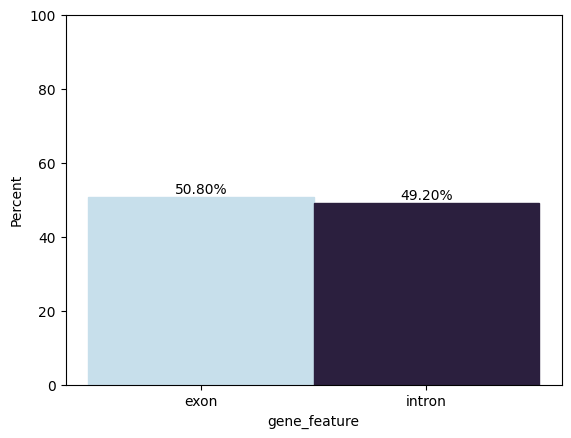

In [17]:
# Create a histogram
palette = seaborn.color_palette(
    "ch:s=.25,rot=-.25", len(exon_ov["gene_feature"].unique())
)

ax = seaborn.histplot(exon_ov["gene_feature"], stat="percent")

# Set ylim
plt.ylim(0, 100)

# Assigning different colors to each bar
for i, bar in enumerate(ax.patches):
    bar.set_color(palette[i])

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

# Show the plot
plt.show()

Similarly, it is possible to categorize peaks into promoter, gene body, etc. groups based on distance and upstream/downstream thresholds using bioframe. Promoter region peaks are filtered here using a maximum threshold of 2000kb upstream from promoter region.

In [18]:
out = bioframe.closest(
    genes,
    ctcf_peak,
    cols1=["seq_name", "gene_seq_start", "gene_seq_end"],
    ignore_overlaps=True,
    ignore_downstream=True,
    k=1,
)
out[
    out["distance"] < 2000
]  # filter for peaks 2000kb upstream or closer to promoter region
out

gene_id gene_name    gene_biotype  gene_seq_start  \
0      ENSG00000000457     SCYL3  protein_coding       169849631   
1      ENSG00000000460  C1orf112  protein_coding       169662007   
2      ENSG00000000938       FGR  protein_coding        27612064   
3      ENSG00000000971       CFH  protein_coding       196651754   
4      ENSG00000001460     STPG1  protein_coding        24356999   
...                ...       ...             ...             ...   
20007  ENSG00000242389    RBMY1E  protein_coding        21903618   
20008  ENSG00000242875    RBMY1B  protein_coding        21511338   
20009  ENSG00000244395    RBMY1D  protein_coding        21880076   
20010  ENSG00000258992     TSPY1  protein_coding         9466955   
20011  ENSG00000280969    RPS4Y2  protein_coding        20756108   

       gene_seq_end seq_name  seq_strand seq_coord_system  \
0         169894267     chr1          -1       chromosome   
1         169854080     chr1           1       chromosome   
2          27635185     chr1          -1       chromosome   
3         196752476     chr1           1       chromosome   
4          24416934     chr1          -1       chromosome   
...             ...      ...         ...              ...   
20007      21918042     chrY          -1       chromosome   
20008      21525786     chrY           1       chromosome   
20009      21894526     chrY          -1       chromosome   
20010       9469749     chrY           1       chromosome   
20011      20781032     chrY           1       chromosome   

                                             description     gene_id_version  \
0      SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...  ENSG00000000457.14   
1      chromosome 1 open reading frame 112 [Source:HG...  ENSG00000000460.17   
2      FGR proto-oncogene, Src family tyrosine kinase...  ENSG00000000938.13   
3      complement factor H [Source:HGNC Symbol;Acc:HG...  ENSG00000000971.17   
4      sperm tail PG-rich repeat containing 1 [Source...  ENSG00000001460.18   
...                                                  ...                 ...   
20007  RNA binding motif protein Y-linked family 1 me...   ENSG00000242389.9   
20008  RNA binding motif protein Y-linked family 1 me...   ENSG00000242875.7   
20009  RNA binding motif protein Y-linked family 1 me...   ENSG00000244395.6   
20010  testis specific protein Y-linked 1 [Source:HGN...   ENSG00000258992.7   
20011  ribosomal protein S4 Y-linked 2 [Source:HGNC S...   ENSG00000280969.2   

       ...     start_       end_  name_  score_ strand_       fc_ -log10p_  \
0      ...  169809746  169810242      .   434.0       .  10.49881     -1.0   
1      ...  169655862  169656358      .    78.0       .   6.05988     -1.0   
2      ...   27609989   27610485      .    78.0       .  11.17754     -1.0   
3      ...  196635316  196635812      .   419.0       .  23.07669     -1.0   
4      ...   24355241   24355737      .    78.0       .   8.59700     -1.0   
...    ...        ...        ...    ...     ...     ...       ...      ...   
20007  ...       <NA>       <NA>   <NA>     NaN    <NA>       NaN      NaN   
20008  ...       <NA>       <NA>   <NA>     NaN    <NA>       NaN      NaN   
20009  ...       <NA>       <NA>   <NA>     NaN    <NA>       NaN      NaN   
20010  ...       <NA>       <NA>   <NA>     NaN    <NA>       NaN      NaN   
20011  ...       <NA>       <NA>   <NA>     NaN    <NA>       NaN      NaN   

       -log10q_  relSummit_  distance  
0       1.78549       248.0     39389  
1       0.38208       248.0      5649  
2       2.06285       248.0      1579  
3       4.96085       248.0     15942  
4       1.08362       248.0      1262  
...         ...         ...       ...  
20007       NaN         NaN      <NA>  
20008       NaN         NaN      <NA>  
20009       NaN         NaN      <NA>  
20010       NaN         NaN      <NA>  
20011       NaN         NaN      <NA>  

[20012 rows x 22 columns]